Epoch 1/100
67/67 [==============================] - 1s 1ms/step - loss: 234486.0938
Epoch 2/100
67/67 [==============================] - 0s 1ms/step - loss: 229258.0469
Epoch 3/100
67/67 [==============================] - 0s 1ms/step - loss: 214250.0938
Epoch 4/100
67/67 [==============================] - 0s 1ms/step - loss: 191686.4375
Epoch 5/100
67/67 [==============================] - 0s 1ms/step - loss: 172441.2031
Epoch 6/100
67/67 [==============================] - 0s 1ms/step - loss: 151968.1406
Epoch 7/100
67/67 [==============================] - 0s 1ms/step - loss: 141999.0156
Epoch 8/100
67/67 [==============================] - 0s 1ms/step - loss: 135931.6094
Epoch 9/100
67/67 [==============================] - 0s 1ms/step - loss: 116328.5234
Epoch 10/100
67/67 [==============================] - 0s 1ms/step - loss: 115373.6172
Epoch 11/100
67/67 [==============================] - 0s 1ms/step - loss: 116265.4766
Epoch 12/100
67/67 [==============================] - 0s 1ms/st

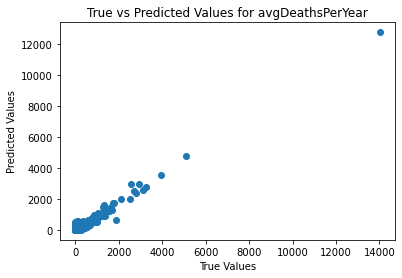


Cross-Validation Scores: [-2.17728033e-01 -9.13896118e-01 -5.59654298e-01 -1.07844156e+04
 -2.46201136e-01 -3.14959876e-01 -1.49947859e+00 -9.39915516e+01
 -2.81266046e+00 -1.78817392e-01]

Average Cross-Validation Score: -1088.5150573126195


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=100, batch_size=32, verbose=1, shuffle=True)
        return self

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

# Load data from CSV file
data = pd.read_csv("/Users/alyssajames/BMEN415/Regression Models/cancer_reg_updated.csv")

# Fill missing values with the mean of the respective column
data = data.fillna(data.mean())

# Separate features and target variable
X = data.drop(['avgDeathsPerYear'], axis=1)
y = data['avgDeathsPerYear']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for better training performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, shuffle=True)

# Predict the target values for the test data
y_pred = model.predict(X_test).flatten()

# Add k-fold cross-validation
k = 10
wrapped_model = KerasRegressor(model)
cv_scores = cross_val_score(wrapped_model, X, y, cv=k)

# Print the mean squared error, root mean squared error, mean absolute error, and R2 score of the model
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

# Create a scatter plot of the true values versus the predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values for avgDeathsPerYear")
plt.show()

# Print the cross-validation scores and their average
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())
